<a href="https://colab.research.google.com/github/ABBU2712/AIcrowd-Mission-Control/blob/main/Stage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aicrowd-cli

In [ ]:
API_KEY = "08882bea69d263e6f7532dca7d30840c" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge stage-prediction -j 3

sample_submission.csv: 100% 13.3k/13.3k [00:00<00:00, 589kB/s]
test.zip: 100% 27.7M/27.7M [00:01<00:00, 23.0MB/s]


In [ ]:
!rm -rf data
!mkdir data

!unzip test.zip -d data

Archive:  test.zip
  inflating: data/test/0.jpg         
  inflating: data/test/1.jpg         
  inflating: data/test/10.jpg        
  inflating: data/test/100.jpg       
  inflating: data/test/1000.jpg      
  inflating: data/test/1001.jpg      
  inflating: data/test/1002.jpg      
  inflating: data/test/1003.jpg      
  inflating: data/test/1004.jpg      
  inflating: data/test/1005.jpg      
  inflating: data/test/1006.jpg      
  inflating: data/test/1007.jpg      
  inflating: data/test/1008.jpg      
  inflating: data/test/1009.jpg      
  inflating: data/test/101.jpg       
  inflating: data/test/1010.jpg      
  inflating: data/test/1011.jpg      
  inflating: data/test/1012.jpg      
  inflating: data/test/1013.jpg      
  inflating: data/test/1014.jpg      
  inflating: data/test/1015.jpg      
  inflating: data/test/1016.jpg      
  inflating: data/test/1017.jpg      
  inflating: data/test/1018.jpg      
  inflating: data/test/1019.jpg      
  inflating: data/test/102.jpg 

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import cv2
import numpy as np
import pandas as pd

In [ ]:
test_imgs_directiory = "data/test"

In [ ]:
all_imgs = []
img_ids_list = []

for count, img_name in enumerate(os.listdir(test_imgs_directiory)):

    img_path = os.path.join(test_imgs_directiory, img_name)
    img = cv2.imread(img_path, 0)

    all_imgs.append(img.flatten())
    img_ids_list.append(count)

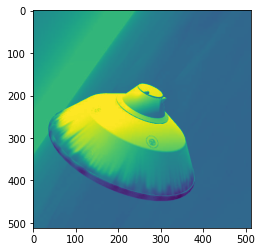

In [ ]:
plt.imshow(img)

In [ ]:
y_pred = KMeans(n_clusters=5, random_state=42,n_init=1,max_iter=1, verbose=True).fit_predict(all_imgs)


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 787823536932.0703


In [ ]:
submission = {'ImageID':img_ids_list, "label":y_pred}

submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',index=False)

In [ ]:
submission

,ImageID,label
0,0,3
1,1,2
2,2,2
3,3,1
4,4,0
...,...,...
1794,1794,2
1795,1795,2
1796,1796,2
1797,1797,1


In [ ]:
!aicrowd submission create -c stage-prediction -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 13.1/11.5 KB • 1.4 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/stage-prediction/submissions/127033              │
│                  │                                                                                                         │
│  All submissions │ https://w